In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Membaca data dari file CSV
file_path = 'data_relevan.csv'
df = pd.read_csv(file_path)
df

,tapInTime,tapOutTime,tapInStops,tapOutStops,corridorID,corridorName,direction
0,2023-04-03 05:21:44,2023-04-03 06:00:53,P00142,P00253,5,Matraman Baru - Ancol,1.0
1,2023-04-03 05:42:44,2023-04-03 06:40:01,B01963P,B03307P,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0
2,2023-04-03 05:59:06,2023-04-03 06:50:55,B00499P,B04962P,R1A,Pantai Maju - Kota,0.0
3,2023-04-03 05:44:51,2023-04-03 06:28:16,B05587P,B03090P,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0
4,2023-04-03 06:17:35,2023-04-03 06:57:03,P00239,P00098,12,Tanjung Priok - Pluit,0.0
...,...,...,...,...,...,...,...
37895,2023-04-21 18:18:37,2023-04-21 19:55:49,P00261,P00228,6B,Ragunan - MH Thamrin via Semanggi,1.0
37896,2023-04-18 21:52:31,2023-04-18 22:28:22,P00064,P00179,9N,Pinang Ranti - Pramuka,1.0
37897,2023-04-04 10:29:47,2023-04-04 13:27:25,B02873P,B00226P,1T,Cibubur - Balai Kota,1.0
37898,2023-04-15 19:59:26,2023-04-15 20:27:50,B02505P,B01787P,JAK.13,Tanah Abang - Jembatan Lima,1.0


In [54]:
df.direction.value_counts()

direction
1.0    18974
0.0    18926
Name: count, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tapInTime     37900 non-null  object 
 1   tapOutTime    36556 non-null  object 
 2   tapInStops    36687 non-null  object 
 3   tapOutStops   35611 non-null  object 
 4   corridorID    36643 non-null  object 
 5   corridorName  35970 non-null  object 
 6   direction     37900 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.0+ MB


In [56]:
# Menghitung jumlah dan persentase missing values untuk setiap kolom
missing_data_count = df.isnull().sum()
total_rows = len(df)

# Menghitung persentase
missing_data_percentage = (missing_data_count / total_rows) * 100

# Membuat DataFrame untuk menampilkan hasil
missing_data_df = pd.DataFrame({
    'Kolom': missing_data_count.index,
    'Jumlah Missing Values': missing_data_count.values,
    'Persentase Missing Values (%)': missing_data_percentage.values
})

missing_data_df.sort_values(by='Persentase Missing Values (%)', ascending=False)


,Kolom,Jumlah Missing Values,Persentase Missing Values (%)
3,tapOutStops,2289,6.039578
5,corridorName,1930,5.092348
1,tapOutTime,1344,3.546174
4,corridorID,1257,3.316623
2,tapInStops,1213,3.200528
0,tapInTime,0,0.000000
6,direction,0,0.000000


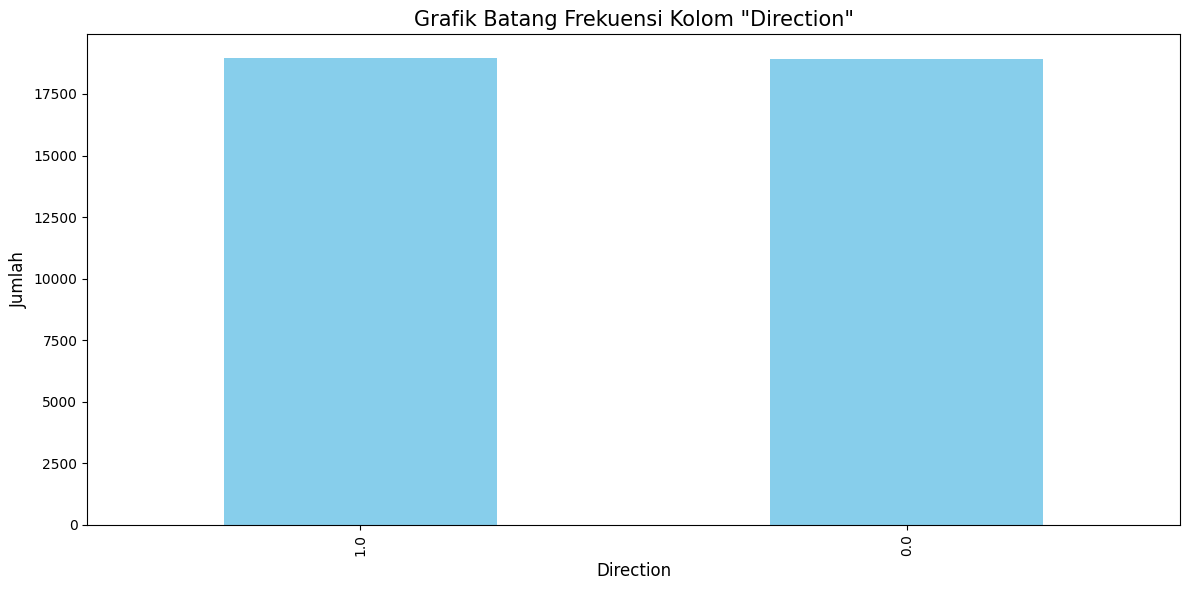

In [57]:
# Menghitung frekuensi dari setiap kategori dalam kolom 'direction'
direction_counts_reload = df['direction'].value_counts()

# Membuat visualisasi bar chart
plt.figure(figsize=(12, 6))
direction_counts_reload.plot(kind='bar', color='skyblue')

plt.title('Grafik Batang Frekuensi Kolom "Direction"', fontsize=15)
plt.xlabel('Direction', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=90)  # Memutar label x jika mereka terlalu panjang

# Menampilkan plot
plt.tight_layout()
plt.show()


In [58]:
# Membuat pemetaan untuk setiap jenis layanan
jenis_layanan = {
    "Reguler BRT": ["1", "2", "2A", "3", "3F", "3H", "4", "4D", "5", "5C", "5D", "6", "6A", "6B", "6V", "7", "7F", "8", "9", "9A", "9C", "9N", "10", "10D", "10H", "11", "12", "13", "13C", "13D", "L13E", "M1", "M10", "M11", "M12", "M13", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9"],
    "Non reguler BRT": ["1A", "1B", "1C", "1E", "1F", "1H", "1M", "1N", "1P", "1Q", "1R", "2B", "2P", "2Q", "3E", "4B", "4C", "4F", "5B", "5F", "5M", "5N", "6C", "6D", "6H", "6K", "6M", "6N", "6Q", "6T", "6U", "7A", "7B", "7D", "7E", "7P", "7Q", "7R", "7T", "7U", "7V", "7W", "8C", "8D", "8E", "8K", "8M", "9D", "9E", "9H", "10K", "11D", "11Q", "12A", "12B", "12P", "14", "JIS3", "R1A"],
    "Royal transjakarta": ["1K", "1T", "1U", "6P", "B13", "B14", "D31", "D32", "S12", "S13", "S14", "S31"],
    "Mikrotrans": ["JAK01", "JAK02", "JAK03", "JAK04", "JAK05", "JAK06", "JAK07", "JAK08", "JAK09", "JAK10", "JAK100", "JAK102", "JAK105", "JAK106", "JAK108", "JAK10A", "JAK10B", "JAK11", "JAK110A", "JAK110B", "JAK112", "JAK113", "JAK115", "JAK117", "JAK118", "JAK12", "JAK120", "JAK13", "JAK14", "JAK15", "JAK16", "JAK17", "JAK18", "JAK19", "JAK20", "JAK21", "JAK22", "JAK23", "JAK24", "JAK25", "JAK26", "JAK27", "JAK28", "JAK29", "JAK30", "JAK31", "JAK32", "JAK33", "JAK34", "JAK35", "JAK36", "JAK37", "JAK38", "JAK39", "JAK40", "JAK41", "JAK42", "JAK43B", "JAK43C", "JAK44", "JAK45", "JAK46", "JAK47", "JAK48A", "JAK48B", "JAK49", "JAK50", "JAK51", "JAK52", "JAK53", "JAK54", "JAK56", "JAK58", "JAK59", "JAK60", "JAK61", "JAK64", "JAK71", "JAK72", "JAK73", "JAK74", "JAK75", "JAK76", "JAK77", "JAK80", "JAK84", "JAK85", "JAK86", "JAK87", "JAK88", "JAK89", "JAK90", "JAK93", "JAK95", "JAK98", "JAK99"],
    "Transjabodetabek": ["7C", "B11", "B21", "D11", "D21", "S11", "S21", "S22", "T11", "T12"]
}

# Fungsi untuk mendapatkan jenis layanan berdasarkan corridorID

In [59]:
# Fungsi untuk mendapatkan jenis layanan berdasarkan corridorID
def get_jenis_layanan(corridor_id):
    for jenis, ids in jenis_layanan.items():
        if corridor_id in ids:
            return jenis
    # Jika corridorID tidak ditemukan di dalam pemetaan, kita bisa mengembalikan None atau kategori khusus
    return "Tidak Diketahui"

# Menerapkan fungsi ke DataFrame untuk membuat kolom baru
df['jenis_kendaraan'] = df['corridorID'].apply(get_jenis_layanan)

# Memeriksa hasilnya dari data yang sudah diperbarui
df


,tapInTime,tapOutTime,tapInStops,tapOutStops,corridorID,corridorName,direction,jenis_kendaraan
0,2023-04-03 05:21:44,2023-04-03 06:00:53,P00142,P00253,5,Matraman Baru - Ancol,1.0,Reguler BRT
1,2023-04-03 05:42:44,2023-04-03 06:40:01,B01963P,B03307P,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Non reguler BRT
2,2023-04-03 05:59:06,2023-04-03 06:50:55,B00499P,B04962P,R1A,Pantai Maju - Kota,0.0,Non reguler BRT
3,2023-04-03 05:44:51,2023-04-03 06:28:16,B05587P,B03090P,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Non reguler BRT
4,2023-04-03 06:17:35,2023-04-03 06:57:03,P00239,P00098,12,Tanjung Priok - Pluit,0.0,Reguler BRT
...,...,...,...,...,...,...,...,...
37895,2023-04-21 18:18:37,2023-04-21 19:55:49,P00261,P00228,6B,Ragunan - MH Thamrin via Semanggi,1.0,Reguler BRT
37896,2023-04-18 21:52:31,2023-04-18 22:28:22,P00064,P00179,9N,Pinang Ranti - Pramuka,1.0,Reguler BRT
37897,2023-04-04 10:29:47,2023-04-04 13:27:25,B02873P,B00226P,1T,Cibubur - Balai Kota,1.0,Royal transjakarta
37898,2023-04-15 19:59:26,2023-04-15 20:27:50,B02505P,B01787P,JAK.13,Tanah Abang - Jembatan Lima,1.0,Tidak Diketahui


In [60]:
# Menghapus titik dari 'corridorID' dan mengupdate nilai dalam kolom
df['corridorID'] = df['corridorID'].str.replace('.', '', regex=False)

# Setelah memperbarui 'corridorID', kita perlu memperbarui 'jenis_kendaraan' dengan pemetaan yang benar
df['jenis_kendaraan'] = df['corridorID'].apply(get_jenis_layanan)

# Verifikasi hasil perubahan dengan menampilkan data yang diperbarui
df

,tapInTime,tapOutTime,tapInStops,tapOutStops,corridorID,corridorName,direction,jenis_kendaraan
0,2023-04-03 05:21:44,2023-04-03 06:00:53,P00142,P00253,5,Matraman Baru - Ancol,1.0,Reguler BRT
1,2023-04-03 05:42:44,2023-04-03 06:40:01,B01963P,B03307P,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Non reguler BRT
2,2023-04-03 05:59:06,2023-04-03 06:50:55,B00499P,B04962P,R1A,Pantai Maju - Kota,0.0,Non reguler BRT
3,2023-04-03 05:44:51,2023-04-03 06:28:16,B05587P,B03090P,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Non reguler BRT
4,2023-04-03 06:17:35,2023-04-03 06:57:03,P00239,P00098,12,Tanjung Priok - Pluit,0.0,Reguler BRT
...,...,...,...,...,...,...,...,...
37895,2023-04-21 18:18:37,2023-04-21 19:55:49,P00261,P00228,6B,Ragunan - MH Thamrin via Semanggi,1.0,Reguler BRT
37896,2023-04-18 21:52:31,2023-04-18 22:28:22,P00064,P00179,9N,Pinang Ranti - Pramuka,1.0,Reguler BRT
37897,2023-04-04 10:29:47,2023-04-04 13:27:25,B02873P,B00226P,1T,Cibubur - Balai Kota,1.0,Royal transjakarta
37898,2023-04-15 19:59:26,2023-04-15 20:27:50,B02505P,B01787P,JAK13,Tanah Abang - Jembatan Lima,1.0,Mikrotrans


In [61]:
# Mengonversi kolom 'tapInTime' dan 'tapOutTime' ke dalam format datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

# Menghitung durasi perjalanan dalam menit
df['durasi_perjalanan'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

# Menampilkan data yang sudah diperbarui untuk memastikan kolom 'durasi_perjalanan' ditambahkan dengan benar
df


,tapInTime,tapOutTime,tapInStops,tapOutStops,corridorID,corridorName,direction,jenis_kendaraan,durasi_perjalanan
0,2023-04-03 05:21:44,2023-04-03 06:00:53,P00142,P00253,5,Matraman Baru - Ancol,1.0,Reguler BRT,39.150000
1,2023-04-03 05:42:44,2023-04-03 06:40:01,B01963P,B03307P,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Non reguler BRT,57.283333
2,2023-04-03 05:59:06,2023-04-03 06:50:55,B00499P,B04962P,R1A,Pantai Maju - Kota,0.0,Non reguler BRT,51.816667
3,2023-04-03 05:44:51,2023-04-03 06:28:16,B05587P,B03090P,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Non reguler BRT,43.416667
4,2023-04-03 06:17:35,2023-04-03 06:57:03,P00239,P00098,12,Tanjung Priok - Pluit,0.0,Reguler BRT,39.466667
...,...,...,...,...,...,...,...,...,...
37895,2023-04-21 18:18:37,2023-04-21 19:55:49,P00261,P00228,6B,Ragunan - MH Thamrin via Semanggi,1.0,Reguler BRT,97.200000
37896,2023-04-18 21:52:31,2023-04-18 22:28:22,P00064,P00179,9N,Pinang Ranti - Pramuka,1.0,Reguler BRT,35.850000
37897,2023-04-04 10:29:47,2023-04-04 13:27:25,B02873P,B00226P,1T,Cibubur - Balai Kota,1.0,Royal transjakarta,177.633333
37898,2023-04-15 19:59:26,2023-04-15 20:27:50,B02505P,B01787P,JAK13,Tanah Abang - Jembatan Lima,1.0,Mikrotrans,28.400000


In [62]:
# Memeriksa tipe data dari setiap kolom
tipe_data = df.dtypes

tipe_data

tapInTime            datetime64[ns]
tapOutTime           datetime64[ns]
tapInStops                   object
tapOutStops                  object
corridorID                   object
corridorName                 object
direction                   float64
jenis_kendaraan              object
durasi_perjalanan           float64
dtype: object

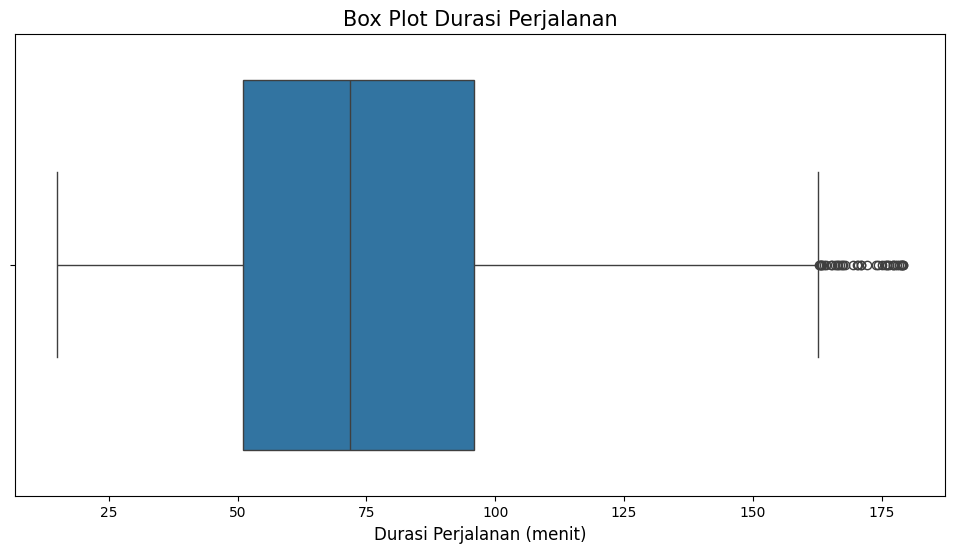

In [63]:
# Mengidentifikasi pencilan menggunakan box plot untuk 'durasi_perjalanan'
plt.figure(figsize=(12, 6))

# Membuat box plot
sns.boxplot(x=df['durasi_perjalanan'])

plt.title('Box Plot Durasi Perjalanan', fontsize=15)
plt.xlabel('Durasi Perjalanan (menit)', fontsize=12)

# Menampilkan plot
plt.show()


In [64]:
# Menghitung median dari 'durasi_perjalanan'
median_durasi = df['durasi_perjalanan'].median()

# Melakukan imputasi nilai yang hilang di kolom 'durasi_perjalanan' dengan median
df['durasi_perjalanan'].fillna(median_durasi, inplace=True)

# Memeriksa apakah imputasi berhasil
df['durasi_perjalanan'].isnull().sum()


0

In [65]:
# Mengelompokkan data berdasarkan 'corridorID' dan menghitung modus 'corridorName' untuk setiap grup.
corridor_mode = df.groupby('corridorID')['corridorName'].agg(pd.Series.mode)

# Mengonversi hasil ke DataFrame untuk memudahkan manipulasi data
corridor_mode_df = corridor_mode.reset_index()

# Membuat fungsi untuk mengisi nilai yang hilang
def fill_missing_values(row):
    if pd.isnull(row['corridorName']) and row['corridorID'] in corridor_mode_df['corridorID'].values:
        return corridor_mode_df.loc[corridor_mode_df['corridorID'] == row['corridorID'], 'corridorName'].values[0]
    else:
        return row['corridorName']

# Mengisi nilai yang hilang di 'corridorName' dengan modus berdasarkan 'corridorID'
df['corridorName'] = df.apply(fill_missing_values, axis=1)

# Memeriksa apakah ada nilai yang hilang yang tersisa di 'corridorName'
remaining_missing = df['corridorName'].isnull().sum()
remaining_missing


1125

In [66]:
# Menghitung persentase nilai yang masih hilang di kolom 'corridorName'
total_rows = df.shape[0]
percentage_missing_corridorName = (remaining_missing / total_rows) * 100
percentage_missing_corridorName


2.9683377308707124

In [67]:
# Mengelompokkan data berdasarkan 'tapInStops' dan menghitung modus 'tapOutStops' untuk setiap grup.
tapout_mode_per_tapin = df.groupby('tapInStops')['tapOutStops'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Mengonversi hasil ke DataFrame untuk memudahkan manipulasi data
tapout_mode_per_tapin_df = tapout_mode_per_tapin.reset_index()

# Menampilkan beberapa baris pertama dari dataframe untuk verifikasi
tapout_mode_per_tapin_df.head()


,tapInStops,tapOutStops
0,B00001P,B00536P
1,B00004P,B05612P
2,B00005P,B05703P
3,B00008P,B05760P
4,B00017P,B04791P


In [68]:
# Fungsi untuk mengisi nilai yang hilang di 'tapOutStops' berdasarkan modus dari 'tapInStops' mereka.
def fill_missing_tapout(row):
    if pd.isnull(row['tapOutStops']) and row['tapInStops'] in tapout_mode_per_tapin_df['tapInStops'].values:
        mode_value = tapout_mode_per_tapin_df.loc[tapout_mode_per_tapin_df['tapInStops'] == row['tapInStops'], 'tapOutStops'].values
        if mode_value.size > 0:
            return mode_value[0]
    return row['tapOutStops']

# Mengisi nilai yang hilang di 'tapOutStops'
df['tapOutStops'] = df.apply(fill_missing_tapout, axis=1)

# Memeriksa apakah ada nilai yang hilang yang tersisa di 'tapOutStops'
remaining_missing_tapout = df['tapOutStops'].isnull().sum()
remaining_missing_tapout


125

In [69]:
# Menghapus semua baris yang memiliki setidaknya satu nilai yang hilang
df_clean_complete = df.dropna()

# Memeriksa jumlah baris yang tersisa setelah penghapusan untuk memastikan operasi berjalan dengan baik
total_rows_after_dropping = df_clean_complete.shape[0]

# Menghitung dan menampilkan persentase data yang dipertahankan setelah penghapusan
percentage_retained = (total_rows_after_dropping / df.shape[0]) * 100
total_rows_after_dropping, percentage_retained


(34184, 90.19525065963062)

In [70]:
# Menghitung persentase nilai yang hilang untuk setiap kolom dalam DataFrame
percentage_missing_all = df.isnull().sum() / total_rows * 100
percentage_missing_all = percentage_missing_all.reset_index()
percentage_missing_all.columns = ['Kolom', 'Persentase Missing Values (%)']
percentage_missing_all


,Kolom,Persentase Missing Values (%)
0,tapInTime,0.000000
1,tapOutTime,3.546174
2,tapInStops,3.200528
3,tapOutStops,0.329815
4,corridorID,3.316623
5,corridorName,2.968338
6,direction,0.000000
7,jenis_kendaraan,0.000000
8,durasi_perjalanan,0.000000


In [71]:
# Menghitung modus untuk 'tapInStops' dan 'tapOutStops'
modus_tapInStops = df['tapInStops'].mode()[0]
modus_tapOutStops = df['tapOutStops'].mode()[0]

# Untuk 'tapOutTime', kita akan menggunakan metode 'forward fill'
df['tapOutTime'].fillna(method='ffill', inplace=True)

# Memeriksa apakah semua imputasi berhasil
df.isnull().sum()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27996\1638175433.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['tapOutTime'].fillna(method='ffill', inplace=True)


tapInTime               0
tapOutTime              0
tapInStops           1213
tapOutStops           125
corridorID           1257
corridorName         1125
direction               0
jenis_kendaraan         0
durasi_perjalanan       0
dtype: int64

In [72]:
# Menghapus baris yang memiliki nilai yang hilang di kolom 'tapOutTime', 'tapInStops', 'tapOutStops', 'corridorID', atau 'corridorName'
df = df.dropna(subset=['tapOutTime', 'tapInStops', 'tapOutStops', 'corridorID', 'corridorName'])

# Untuk verifikasi, Anda dapat menampilkan jumlah baris yang tersisa setelah penghapusan
print("Jumlah baris setelah menghapus nilai yang hilang:", len(df))


Jumlah baris setelah menghapus nilai yang hilang: 35407


In [73]:
# Menghitung persentase nilai yang hilang untuk setiap kolom dalam DataFrame
percentage_missing_all = df.isnull().sum() / total_rows * 100
percentage_missing_all = percentage_missing_all.reset_index()
percentage_missing_all.columns = ['Kolom', 'Persentase Missing Values (%)']
percentage_missing_all

,Kolom,Persentase Missing Values (%)
0,tapInTime,0.0
1,tapOutTime,0.0
2,tapInStops,0.0
3,tapOutStops,0.0
4,corridorID,0.0
5,corridorName,0.0
6,direction,0.0
7,jenis_kendaraan,0.0
8,durasi_perjalanan,0.0


In [74]:
# Memperbarui kolom 'durasi_perjalanan' dengan membulatkan nilai ke bilangan bulat terdekat,
# sambil mengabaikan nilai non-finite (NaN atau tak terhingga)
df['durasi_perjalanan'] = df['durasi_perjalanan'].round().dropna().astype(int)

# Menampilkan beberapa baris pertama dari data yang sudah diperbarui untuk memastikan perubahan telah dilakukan dengan benar
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27996\2185878031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['durasi_perjalanan'] = df['durasi_perjalanan'].round().dropna().astype(int)


,tapInTime,tapOutTime,tapInStops,tapOutStops,corridorID,corridorName,direction,jenis_kendaraan,durasi_perjalanan
0,2023-04-03 05:21:44,2023-04-03 06:00:53,P00142,P00253,5,Matraman Baru - Ancol,1.0,Reguler BRT,39
1,2023-04-03 05:42:44,2023-04-03 06:40:01,B01963P,B03307P,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Non reguler BRT,57
2,2023-04-03 05:59:06,2023-04-03 06:50:55,B00499P,B04962P,R1A,Pantai Maju - Kota,0.0,Non reguler BRT,52
3,2023-04-03 05:44:51,2023-04-03 06:28:16,B05587P,B03090P,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Non reguler BRT,43
4,2023-04-03 06:17:35,2023-04-03 06:57:03,P00239,P00098,12,Tanjung Priok - Pluit,0.0,Reguler BRT,39
...,...,...,...,...,...,...,...,...,...
37895,2023-04-21 18:18:37,2023-04-21 19:55:49,P00261,P00228,6B,Ragunan - MH Thamrin via Semanggi,1.0,Reguler BRT,97
37896,2023-04-18 21:52:31,2023-04-18 22:28:22,P00064,P00179,9N,Pinang Ranti - Pramuka,1.0,Reguler BRT,36
37897,2023-04-04 10:29:47,2023-04-04 13:27:25,B02873P,B00226P,1T,Cibubur - Balai Kota,1.0,Royal transjakarta,178
37898,2023-04-15 19:59:26,2023-04-15 20:27:50,B02505P,B01787P,JAK13,Tanah Abang - Jembatan Lima,1.0,Mikrotrans,28


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27996\4210623582.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jumlah_perjalanan_ekstrem.index, y=jumlah_perjalanan_ekstrem.values, palette='viridis')


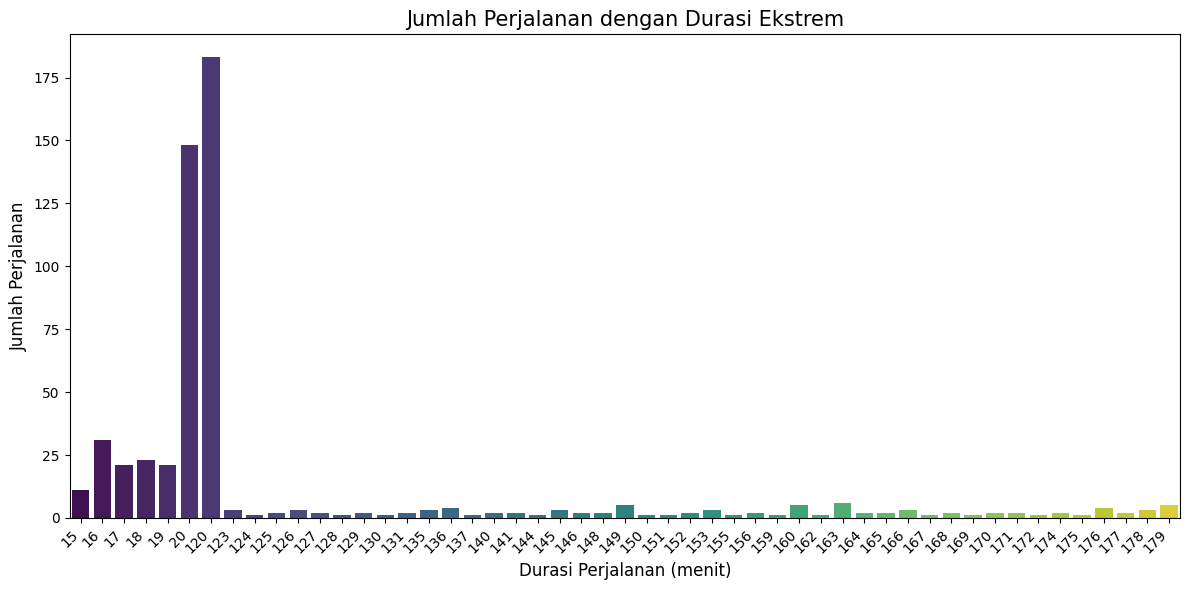

In [75]:
# Mengidentifikasi batas atas dan bawah untuk apa yang dianggap "normal"
# Ini biasanya dilakukan dengan metode IQR, tetapi untuk simplicitas, kita bisa menggunakan persentil

# Menghitung persentil untuk menentukan apa yang dianggap ekstrem
bawah, atas = df['durasi_perjalanan'].quantile([0.01, 0.99]).values  # 1% dan 99% untuk menangkap pencilan

# Menyaring data untuk hanya mencakup perjalanan dengan durasi di luar batas normal
data_ekstrem = df[(df['durasi_perjalanan'] < bawah) | (df['durasi_perjalanan'] > atas)]

# Menghitung jumlah perjalanan ekstrem
jumlah_perjalanan_ekstrem = data_ekstrem['durasi_perjalanan'].value_counts()

# Membuat barchart untuk nilai yang tidak wajar
plt.figure(figsize=(12, 6))
sns.barplot(x=jumlah_perjalanan_ekstrem.index, y=jumlah_perjalanan_ekstrem.values, palette='viridis')

plt.title('Jumlah Perjalanan dengan Durasi Ekstrem', fontsize=15)
plt.xlabel('Durasi Perjalanan (menit)', fontsize=12)
plt.ylabel('Jumlah Perjalanan', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotasi label x agar mudah dibaca
plt.tight_layout()

# Menampilkan grafik
plt.show()


In [76]:
# Langkah 1: Konfirmasi tidak ada nilai yang hilang di "durasi_perjalanan"
tidak_ada_missing_values = df['durasi_perjalanan'].isnull().sum() == 0

# Langkah 2: Pemeriksaan pencilan dengan deskripsi statistik
deskripsi_durasi = df['durasi_perjalanan'].describe()

tidak_ada_missing_values, deskripsi_durasi


(True,
 count    35407.000000
 mean        72.190527
 std         27.596783
 min         15.000000
 25%         52.000000
 50%         72.000000
 75%         95.000000
 max        179.000000
 Name: durasi_perjalanan, dtype: float64)

In [77]:
# Mengonversi "durasi_perjalanan" ke integer terdekat (dalam menit)
df['durasi_perjalanan'] = df['durasi_perjalanan'].astype(int)

# Memeriksa tipe data dari kolom dan beberapa entri teratas untuk memastikan konversi berhasil
tipe_data_durasi = df['durasi_perjalanan'].dtype
data_teratas_durasi = df.head()

tipe_data_durasi, data_teratas_durasi[['durasi_perjalanan']]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27996\852138713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['durasi_perjalanan'] = df['durasi_perjalanan'].astype(int)


(dtype('int32'),
    durasi_perjalanan
 0                 39
 1                 57
 2                 52
 3                 43
 4                 39)

In [78]:
# Menentukan path di mana file CSV yang sudah dibersihkan akan disimpan
path_bersih = "data_relevan_bersih.csv"

# Menyimpan dataframe ke file CSV
df.to_csv(path_bersih, index=False)  # index=False mencegah penulisan kolom indeks ke file

# Memberikan path file yang sudah disimpan ke pengguna
path_bersih


'data_relevan_bersih.csv'